In [ ]:
2025 Summer - Advanced Big Data and Data Mining (MSCS-634-B01) - Second Bi-term
Lab 6: Association Rule Mining with Apriori and FP-Growth
Name: Shashwat Baral

In [1]:
!pip install mlxtend pandas seaborn matplotlib --quiet

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

In [3]:
# For better plot display
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

In [4]:
# ============================
# Step 2: Load Dataset
# ============================
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Remove missing CustomerID (invalid transactions)
df.dropna(subset=["CustomerID"], inplace=True)

In [7]:
# Remove negative or zero quantities (returns/cancellations)
df = df[df["Quantity"] > 0]

In [9]:
# Focus on UK transactions for simplicity
df = df[df["Country"] == "United Kingdom"]

In [10]:
# ============================
# Step 4: Prepare Basket Format
# ============================
basket = (df
          .groupby(["InvoiceNo", "Description"])["Quantity"]
          .sum()
          .unstack()
          .fillna(0))

In [11]:
# Convert to binary format (0/1 for presence of an item)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

/tmp/ipython-input-522033968.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)


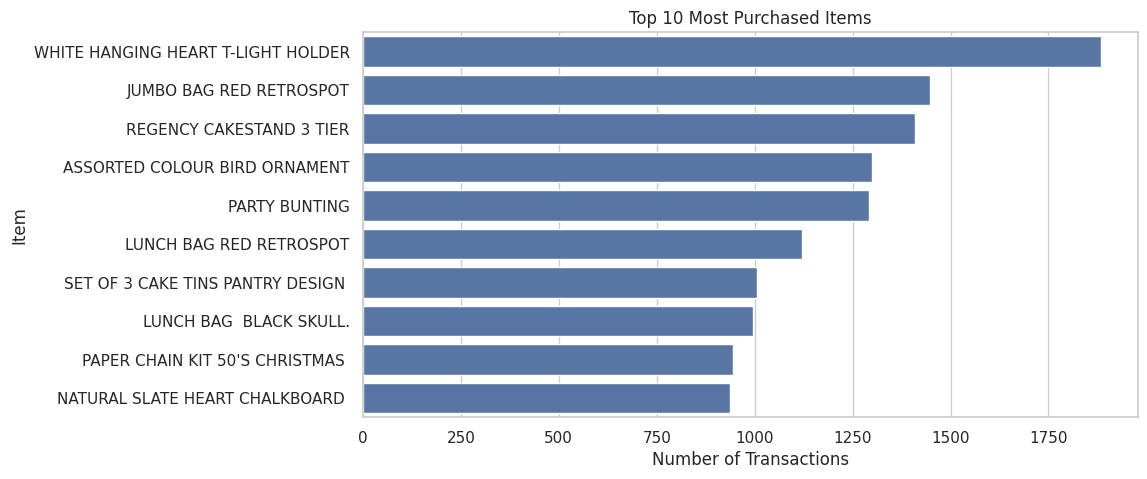

In [12]:
# Top 10 most purchased items
item_counts = basket_sets.sum().sort_values(ascending=False)[:10]
sns.barplot(x=item_counts.values, y=item_counts.index)
plt.title("Top 10 Most Purchased Items")
plt.xlabel("Number of Transactions")
plt.ylabel("Item")
plt.show()

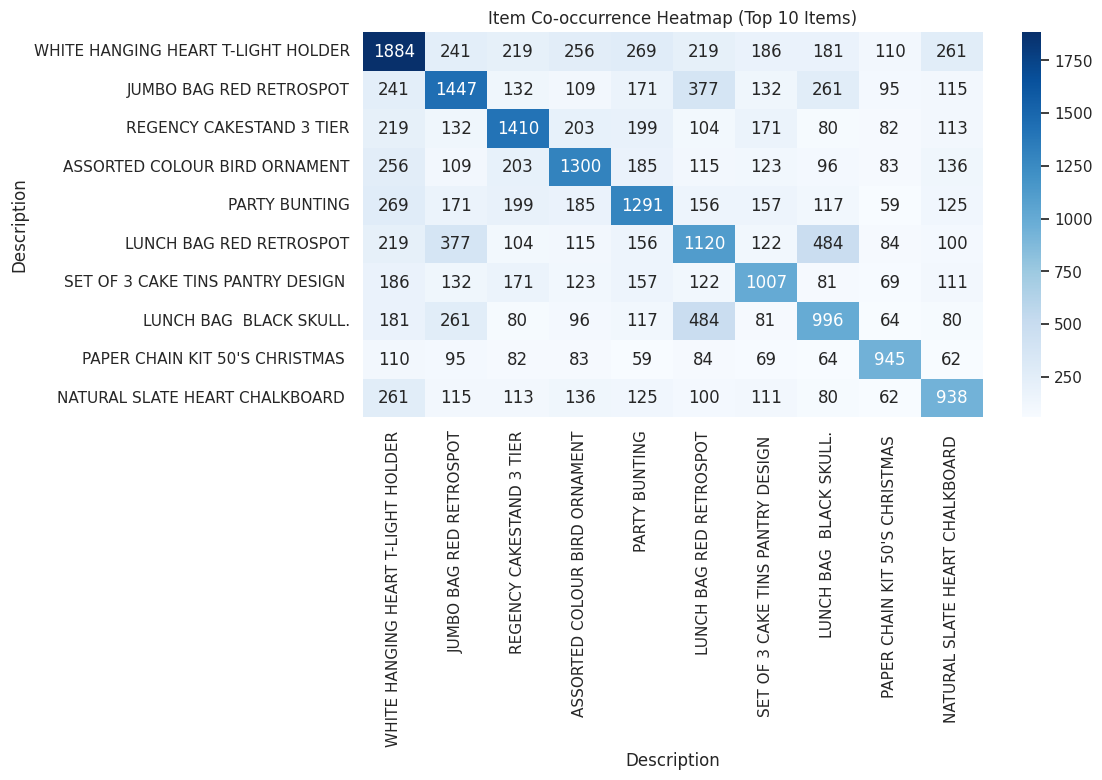

In [13]:
# Co-occurrence heatmap for top 10 items
top_items = item_counts.index
co_occurrence = basket_sets[top_items].T.dot(basket_sets[top_items])
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
plt.title("Item Co-occurrence Heatmap (Top 10 Items)")
plt.show()

In [14]:
# ============================
# Step 6: Apriori Algorithm
# ============================
frequent_itemsets_apriori = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets_apriori.sort_values(by="support", ascending=False).head()

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
184,0.113160,(WHITE HANGING HEART T-LIGHT HOLDER)
79,0.086912,(JUMBO BAG RED RETROSPOT)
149,0.084690,(REGENCY CAKESTAND 3 TIER)
11,0.078083,(ASSORTED COLOUR BIRD ORNAMENT)
123,0.077542,(PARTY BUNTING)


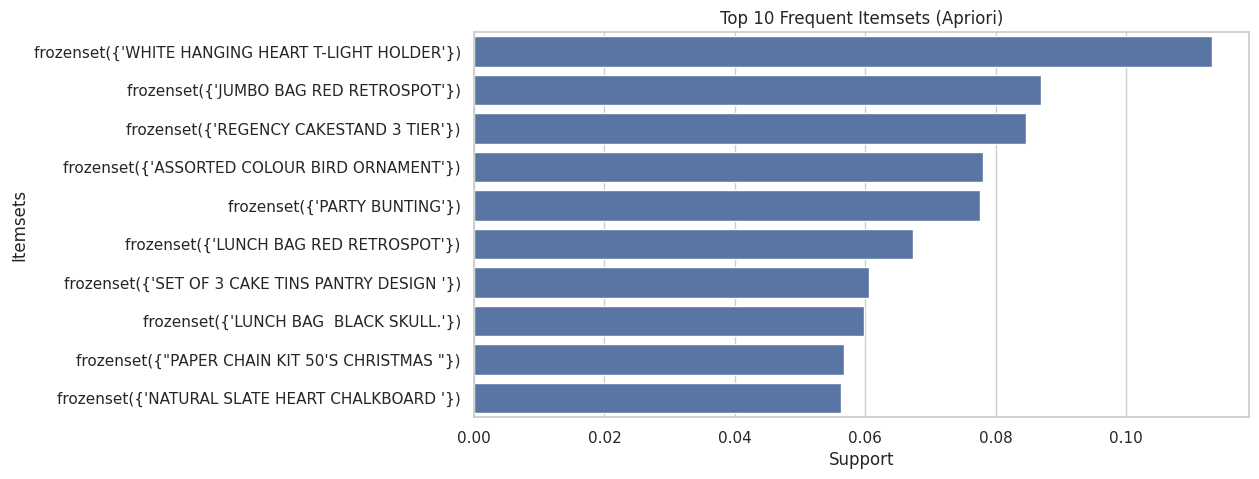

In [15]:
# Visualization
top_apriori = frequent_itemsets_apriori.nlargest(10, "support")
sns.barplot(x="support", y=top_apriori["itemsets"].astype(str), data=top_apriori)
plt.title("Top 10 Frequent Itemsets (Apriori)")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

In [16]:
# ============================
# Step 7: FP-Growth Algorithm
# ============================
frequent_itemsets_fpgrowth = fpgrowth(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets_fpgrowth.sort_values(by="support", ascending=False).head()

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.113160,(WHITE HANGING HEART T-LIGHT HOLDER)
43,0.086912,(JUMBO BAG RED RETROSPOT)
111,0.084690,(REGENCY CAKESTAND 3 TIER)
2,0.078083,(ASSORTED COLOUR BIRD ORNAMENT)
156,0.077542,(PARTY BUNTING)


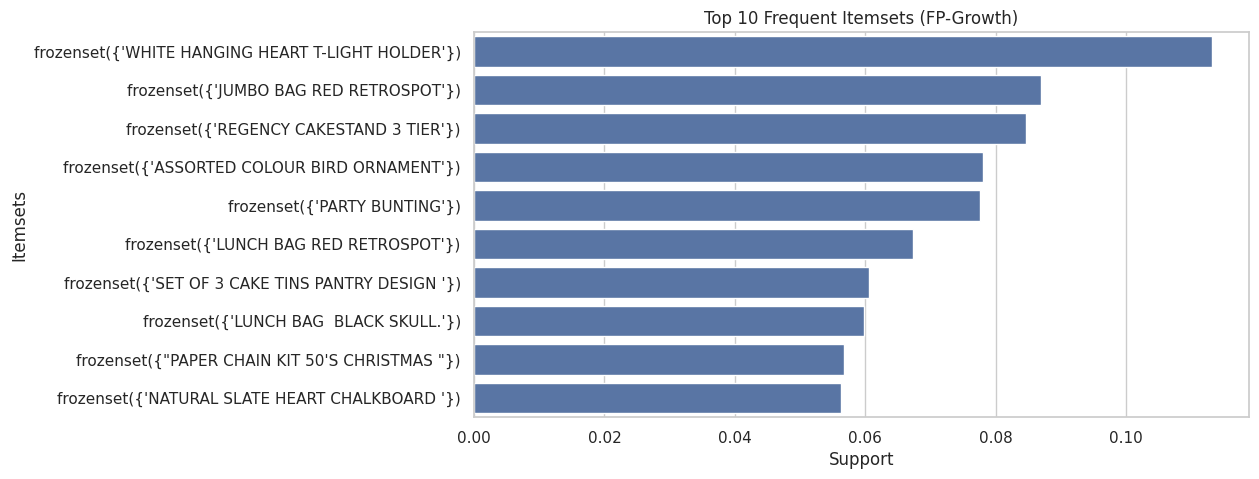

In [17]:
# Visualization
top_fpgrowth = frequent_itemsets_fpgrowth.nlargest(10, "support")
sns.barplot(x="support", y=top_fpgrowth["itemsets"].astype(str), data=top_fpgrowth)
plt.title("Top 10 Frequent Itemsets (FP-Growth)")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

In [18]:
# ============================
# Step 8: Association Rules
# ============================
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.5)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.5)


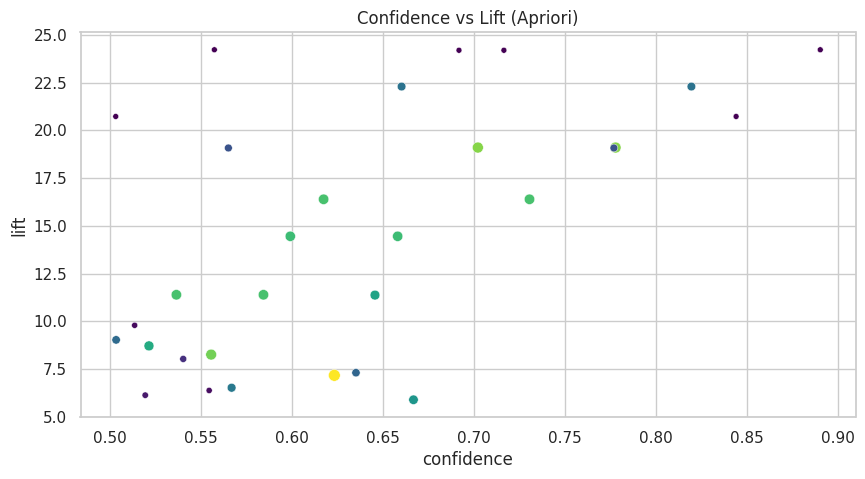

In [19]:
# Scatter plot Confidence vs Lift (Apriori)
sns.scatterplot(data=rules_apriori, x="confidence", y="lift", size="support", hue="support", palette="viridis", legend=False)
plt.title("Confidence vs Lift (Apriori)")
plt.show()

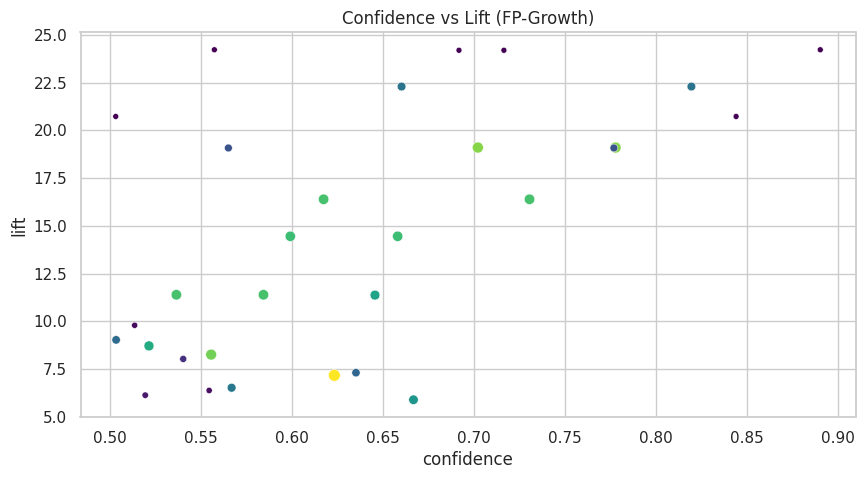

In [20]:
# Scatter plot Confidence vs Lift (FP-Growth)
sns.scatterplot(data=rules_fpgrowth, x="confidence", y="lift", size="support", hue="support", palette="viridis", legend=False)
plt.title("Confidence vs Lift (FP-Growth)")
plt.show()

In [21]:
# ============================
# Step 9: Comparative Analysis
# ============================
print("Apriori - Number of Frequent Itemsets:", len(frequent_itemsets_apriori))
print("FP-Growth - Number of Frequent Itemsets:", len(frequent_itemsets_fpgrowth))

Apriori - Number of Frequent Itemsets: 235
FP-Growth - Number of Frequent Itemsets: 235
